In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

In [9]:
data_dir = '/content/drive/MyDrive/result'

img_height,img_width=224,224
batch_size=2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3919 files belonging to 4 classes.
Using 3136 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3919 files belonging to 4 classes.
Using 783 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4']


In [16]:
mobilenet_model = tf.keras.models.Sequential()

pretrained_model= tf.keras.applications.MobileNetV3Large(
    input_shape=(224,224,3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    classes=4,
    pooling='avg',
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True
)

for layer in pretrained_model.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model)
mobilenet_model.add(tf.keras.layers.Flatten())
mobilenet_model.add(tf.keras.layers.Dense(512, activation='relu'))
mobilenet_model.add(tf.keras.layers.Dense(4, activation='softmax'))

In [17]:
mobilenet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 960)              2996352   
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 960)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               492032    
                                                                 
 dense_7 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 3,490,436
Trainable params: 494,084
Non-trainable params: 2,996,352
_________________________________________________________________


In [18]:
mobilenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = mobilenet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
1568/1568 [==============================] - 595s 363ms/step - loss: 0.6490 - accuracy: 0.7541 - val_loss: 0.5360 - val_accuracy: 0.8123
Epoch 2/30
1568/1568 [==============================] - 43s 27ms/step - loss: 0.2153 - accuracy: 0.9168 - val_loss: 0.2582 - val_accuracy: 0.8991
Epoch 3/30
1568/1568 [==============================] - 42s 27ms/step - loss: 0.1278 - accuracy: 0.9528 - val_loss: 0.1215 - val_accuracy: 0.9451
Epoch 4/30
1568/1568 [==============================] - 43s 27ms/step - loss: 0.1104 - accuracy: 0.9573 - val_loss: 0.1512 - val_accuracy: 0.9476
Epoch 5/30
1568/1568 [==============================] - 42s 27ms/step - loss: 0.0728 - accuracy: 0.9758 - val_loss: 0.4260 - val_accuracy: 0.8863
Epoch 6/30
1568/1568 [==============================] - 43s 27ms/step - loss: 0.0674 - accuracy: 0.9739 - val_loss: 0.2038 - val_accuracy: 0.9387
Epoch 7/30
1568/1568 [==============================] - 43s 27ms/step - loss: 0.0701 - accuracy: 0.9802 - val_loss: 0.2279

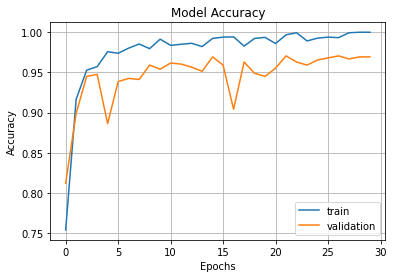

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

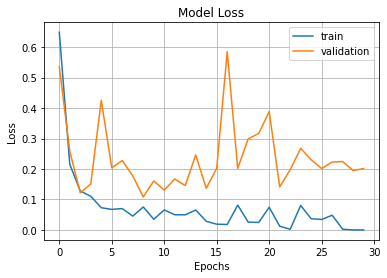

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.5 MB/s 
     |████████████████████████████████| 462 kB 11.2 MB/s 


In [24]:
import tensorflowjs as tfjs

tfjs_target_dir = '/content/drive/MyDrive/tfjs/v3'
tfjs.converters.save_keras_model(mobilenet_model, tfjs_target_dir)